## pangeblocks

In [60]:
import sys
from pathlib import Path

# add parent folder to the path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.time_verbose_extractor import time_from_log

## Pangeblocks
___

In [61]:
REF_EXPERIMENT="didelot"
TOOL="pangeblocks"

PATH_LOGS=Path(f"/data/pangeblocks-experiments/{REF_EXPERIMENT}-{TOOL}")
logs = list(PATH_LOGS.rglob("*err.log"))
len(logs)

420

In [62]:
for log in logs: print(log)

/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op1.53-ep0/logs/slpa-simu.fasta-rule-decompose_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op1.53-ep0/logs/slpa-basis.fasta-rule-compute_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op1.53-ep0/logs/slpa-simu.fasta-rule-compute_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op1.53-ep0/logs/slpa-basis.fasta-rule-decompose_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op1.53-ep0/logs/slpa-real.fasta-rule-compute_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op1.53-ep0/logs/slpa-real.fasta-rule-decompose_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op1.53-ep0/logs/coli27-86.fasta-rule-compute_blocks.err.log
/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op1.

In [63]:
data_from_logs = []

for log in logs:
    
    name_input, rule = log.stem.replace(".err","").split("-rule-")
    name_input=name_input.replace(".fasta","")

    metadata_rule=dict()
    if rule in ["pangeblock", "postprocessing_gfa", "unchop_gfa"]:

        # penalization and min_len
        penalization, min_len = log.parent.stem.split("-")
        penalization = int(penalization.replace("penalization",""))
        min_len = int(min_len.replace("min_len",""))

        # objective function
        obj_function = log.parent.parent.stem

        metadata_rule = {
            "obj_function": obj_function,
            "penalization": penalization,
            "min_len": min_len,
            }

    # msa 
    folder_msa = [t for t in str(log).split("/") if "output-" in t][0]
    msa = folder_msa.split(f"-{REF_EXPERIMENT}-")[1]

    data_log = {"name_input": name_input,
                "rule": rule,
                "msa": msa,
                "metadata-rule": metadata_rule
                }

    data_log.update(time_from_log(log))

    data_from_logs.append(
        data_log
    )

In [64]:
log.stem

'coli27-86.fasta-rule-postprocessing_gfa.err'

In [65]:
import pandas as pd
times_pangeblocks=pd.DataFrame(data_from_logs)
rules = times_pangeblocks.rule.unique() #["compute_blocks","decompose_blocks","pangeblock","postprocessing_gfa","unchop_gfa"]
times_pangeblocks

,name_input,rule,msa,metadata-rule,user_time,sys_time,wall_clock,max_mem
0,slpa-simu,decompose_blocks,mafft.op1.53-ep0,{},683.44,0.78,685.64,534228
1,slpa-basis,compute_blocks,mafft.op1.53-ep0,{},4.17,0.05,4.23,59928
2,slpa-simu,compute_blocks,mafft.op1.53-ep0,{},14.44,0.23,14.70,189492
3,slpa-basis,decompose_blocks,mafft.op1.53-ep0,{},71.72,0.15,72.05,91796
4,slpa-real,compute_blocks,mafft.op1.53-ep0,{},9.48,0.14,9.64,144928
...,...,...,...,...,...,...,...,...
415,slpa-simu,unchop_gfa,mafft.op3-ep0,"{'obj_function': 'nodes', 'penalization': 0, '...",0.17,0.00,0.18,7952
416,slpa-basis,pangeblock,mafft.op3-ep0,"{'obj_function': 'nodes', 'penalization': 0, '...",20.54,0.81,21.56,199764
417,slpa-real,postprocessing_gfa,mafft.op3-ep0,"{'obj_function': 'nodes', 'penalization': 0, '...",1.19,0.05,1.26,34604
418,slpa-simu,pangeblock,mafft.op3-ep0,"{'obj_function': 'nodes', 'penalization': 0, '...",930.64,26.85,977.50,6804848


In [66]:
# create an auxiliar column to apply 'explode' and then 'groupby' at the granularity of each GFA 
all_options = list(set([tuple(d.values()) for d in times_pangeblocks["metadata-rule"].tolist() if len(d)>0]))
times_pangeblocks["metadata-explode"]=times_pangeblocks["metadata-rule"].apply(lambda m: [tuple(m.values())] if len(m)>0 else all_options)
times_pangeblocks=times_pangeblocks.explode("metadata-explode")

In [67]:
times_pangeblocks

,name_input,rule,msa,metadata-rule,user_time,sys_time,wall_clock,max_mem,metadata-explode
0,slpa-simu,decompose_blocks,mafft.op1.53-ep0,{},683.44,0.78,685.64,534228,"(weighted, 5, 10)"
0,slpa-simu,decompose_blocks,mafft.op1.53-ep0,{},683.44,0.78,685.64,534228,"(weighted, 7, 10)"
0,slpa-simu,decompose_blocks,mafft.op1.53-ep0,{},683.44,0.78,685.64,534228,"(weighted, 5, 3)"
0,slpa-simu,decompose_blocks,mafft.op1.53-ep0,{},683.44,0.78,685.64,534228,"(weighted, 3, 10)"
0,slpa-simu,decompose_blocks,mafft.op1.53-ep0,{},683.44,0.78,685.64,534228,"(weighted, 7, 3)"
...,...,...,...,...,...,...,...,...,...
415,slpa-simu,unchop_gfa,mafft.op3-ep0,"{'obj_function': 'nodes', 'penalization': 0, '...",0.17,0.00,0.18,7952,"(nodes, 0, 0)"
416,slpa-basis,pangeblock,mafft.op3-ep0,"{'obj_function': 'nodes', 'penalization': 0, '...",20.54,0.81,21.56,199764,"(nodes, 0, 0)"
417,slpa-real,postprocessing_gfa,mafft.op3-ep0,"{'obj_function': 'nodes', 'penalization': 0, '...",1.19,0.05,1.26,34604,"(nodes, 0, 0)"
418,slpa-simu,pangeblock,mafft.op3-ep0,"{'obj_function': 'nodes', 'penalization': 0, '...",930.64,26.85,977.50,6804848,"(nodes, 0, 0)"


In [68]:
times_by_gfa=times_pangeblocks.groupby(["name_input","msa","metadata-explode","rule"]).agg({"user_time": 'sum',"sys_time": 'sum',"wall_clock":'sum', "max_mem": 'max'})
times_by_gfa

user_time  \
name_input msa              metadata-explode  rule                            
coli27-86  mafft.op1.53-ep0 (nodes, 0, 0)     compute_blocks           4.84   
                                              decompose_blocks        46.98   
                                              pangeblock             170.54   
                                              postprocessing_gfa       0.20   
                                              unchop_gfa               0.25   
...                                                                     ...   
slpa-simu  mafft.op5-ep0    (weighted, 7, 10) compute_blocks          14.36   
                                              decompose_blocks       619.26   
                                              pangeblock            1165.26   
                                              postprocessing_gfa       1.91   
                                              unchop_gfa               0.25   

                                                                  sys_time  \
name_input msa              metadata-explode  rule                           
coli27-86  mafft.op1.53-ep0 (nodes, 0, 0)     compute_blocks          0.10   
                                              decompose_blocks        0.17   
                                              pangeblock              2.24   
                                              postprocessing_gfa      0.05   
                                              unchop_gfa              0.01   
...                                                                    ...   
slpa-simu  mafft.op5-ep0    (weighted, 7, 10) compute_blocks          0.24   
                                              decompose_blocks        0.65   
                                              pangeblock             69.76   
                                              postprocessing_gfa      0.08   
                                              unchop_gfa              0.02   

                                                                  wall_clock  \
name_input msa              metadata-explode  rule                             
coli27-86  mafft.op1.53-ep0 (nodes, 0, 0)     compute_blocks            4.95   
                                              decompose_blocks         47.28   
                                              pangeblock              175.26   
                                              postprocessing_gfa        0.26   
                                              unchop_gfa                0.27   
...                                                                      ...   
slpa-simu  mafft.op5-ep0    (weighted, 7, 10) compute_blocks           14.64   
                                              decompose_blocks        621.98   
                                              pangeblock             1285.11   
                                              postprocessing_gfa        2.01   
                                              unchop_gfa                0.27   

                                                                  max_mem  
name_input msa              metadata-explode  rule                         
coli27-86  mafft.op1.53-ep0 (nodes, 0, 0)     compute_blocks        97428  
                                              decompose_blocks     163020  
                                              pangeblock           239824  
                                              postprocessing_gfa    28580  
                                              unchop_gfa             6116  
...                                                                   ...  
slpa-simu  mafft.op5-ep0    (weighted, 7, 10) compute_blocks       175300  
                                              decompose_blocks     504456  
                                              pangeblock          7055000  
                                              postprocessing_gfa    37836  
                                              unchop_gfa             7

In [69]:
times_by_rule = times_by_gfa["user_time"].unstack()
times_by_rule["total"] = times_by_rule.apply(lambda row: sum(row[rule] for rule in rules), axis=1) 
times_by_rule["id"] = ["|".join([idx[0],idx[1],"-".join(str(i) for i in idx[2])]) for idx in times_by_rule.index]

<Axes: xlabel='name_input,msa,metadata-explode'>

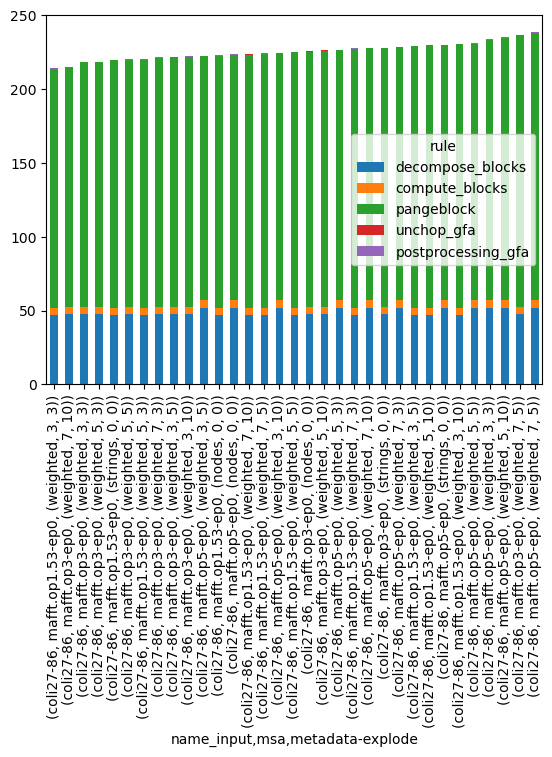

In [71]:
times_by_rule.query("`name_input`=='coli27-86'").sort_values(by="total")[[x for x in rules]].plot(kind="bar", stacked=True)

## Makeprg
___

In [72]:
# REF_EXPERIMENT="didelot"
TOOL="makeprg"

PATH_LOGS=Path(f"/data/pangeblocks-experiments/{REF_EXPERIMENT}-{TOOL}")
logs = list(PATH_LOGS.rglob("*.log"))
len(logs)

24

In [73]:
data_from_logs=[]
for log in logs:
    name_input, rule = log.stem.replace(".err","").split("-rule-")
    name_input=name_input.replace(".fasta","")

    print(time_from_log(log))

    # msa 
    folder_msa = [t for t in str(log).split("/") if "output-" in t][0]
    msa = folder_msa.split(f"-{REF_EXPERIMENT}-")[1]

    data_log = {"name_input": name_input,
                "rule": rule,
                "msa": msa,
                }

    data_log.update(time_from_log(log))

    data_from_logs.append(data_log)

{'user_time': 0.02, 'sys_time': 0.0, 'wall_clock': 0.02, 'max_mem': 8896}
{'user_time': 0.01, 'sys_time': 0.01, 'wall_clock': 0.02, 'max_mem': 8732}
{'user_time': 0.01, 'sys_time': 0.01, 'wall_clock': 0.02, 'max_mem': 8308}
{'user_time': 5.63, 'sys_time': 1.38, 'wall_clock': 7.11, 'max_mem': 93644}
{'user_time': 0.02, 'sys_time': 0.01, 'wall_clock': 0.03, 'max_mem': 9656}
{'user_time': 7.59, 'sys_time': 1.3, 'wall_clock': 8.97, 'max_mem': 92712}
{'user_time': 4.48, 'sys_time': 1.26, 'wall_clock': 5.8, 'max_mem': 92724}
{'user_time': 12.74, 'sys_time': 1.28, 'wall_clock': 14.13, 'max_mem': 97876}
{'user_time': 0.01, 'sys_time': 0.0, 'wall_clock': 0.02, 'max_mem': 8424}
{'user_time': 4.44, 'sys_time': 1.16, 'wall_clock': 5.62, 'max_mem': 92844}
{'user_time': 12.1, 'sys_time': 1.24, 'wall_clock': 13.42, 'max_mem': 95640}
{'user_time': 7.03, 'sys_time': 1.32, 'wall_clock': 8.42, 'max_mem': 92764}
{'user_time': 0.02, 'sys_time': 0.0, 'wall_clock': 0.03, 'max_mem': 9616}
{'user_time': 0.02, 

In [74]:
log.stem.replace(".err","").split("-rule-")

['slpa-simu.fasta', 'postprocessing']

In [75]:
times_makeprg=pd.DataFrame(data_from_logs)
times_makeprg.head()


,name_input,rule,msa,user_time,sys_time,wall_clock,max_mem
0,slpa-real,postprocessing,mafft.op1.53-ep0,0.02,0.00,0.02,8896
1,coli27-86,postprocessing,mafft.op1.53-ep0,0.01,0.01,0.02,8732
2,slpa-basis,postprocessing,mafft.op1.53-ep0,0.01,0.01,0.02,8308
3,coli27-86,generate_prg,mafft.op1.53-ep0,5.63,1.38,7.11,93644
4,slpa-simu,postprocessing,mafft.op1.53-ep0,0.02,0.01,0.03,9656


In [76]:
times_by_gfa=times_makeprg.groupby(["name_input","msa","rule"]).agg({"user_time": 'sum',"sys_time": 'sum',"wall_clock":'sum', "max_mem": 'max'})
times_by_gfa

user_time  sys_time  wall_clock  \
name_input msa              rule                                              
coli27-86  mafft.op1.53-ep0 generate_prg         5.63      1.38        7.11   
                            postprocessing       0.01      0.01        0.02   
           mafft.op3-ep0    generate_prg         5.85      1.23        7.19   
                            postprocessing       0.02      0.00        0.02   
           mafft.op5-ep0    generate_prg         5.75      1.35        7.18   
                            postprocessing       0.02      0.00        0.02   
slpa-basis mafft.op1.53-ep0 generate_prg         4.48      1.26        5.80   
                            postprocessing       0.01      0.01        0.02   
           mafft.op3-ep0    generate_prg         4.20      1.26        5.57   
                            postprocessing       0.01      0.00        0.02   
           mafft.op5-ep0    generate_prg         4.44      1.16        5.62   
                            postprocessing       0.01      0.00        0.02   
slpa-real  mafft.op1.53-ep0 generate_prg         7.59      1.30        8.97   
                            postprocessing       0.02      0.00        0.02   
           mafft.op3-ep0    generate_prg         7.21      1.23        8.55   
                            postprocessing       0.02      0.00        0.03   
           mafft.op5-ep0    generate_prg         7.03      1.32        8.42   
                            postprocessing       0.02      0.00        0.02   
slpa-simu  mafft.op1.53-ep0 generate_prg        12.74      1.28       14.13   
                            postprocessing       0.02      0.01        0.03   
           mafft.op3-ep0    generate_prg        12.48      1.23       13.87   
                            postprocessing       0.02      0.00        0.03   
           mafft.op5-ep0    generate_prg        12.10      1.24       13.42   
                            postprocessing       0.02      0.00        0.03   

                                            max_mem  
name_input msa              rule                     
coli27-86  mafft.op1.53-ep0 generate_prg      93644  
                            postprocessing     8732  
           mafft.op3-ep0    generate_prg      93608  
                            postprocessing     8808  
           mafft.op5-ep0    generate_prg      93516  
                            postprocessing     8812  
slpa-basis mafft.op1.53-ep0 generate_prg      92724  
                            postprocessing     8308  
           mafft.op3-ep0    generate_prg      92760  
                            postprocessing     8304  
           mafft.op5-ep0    generate_prg      92844  
                            postprocessing     8424  
slpa-real  mafft.op1.53-ep0 generate_prg      92712  
                            postprocessing     8896  
           mafft.op3-ep0    generate_prg      92824  
                            postprocessing     8776  
           mafft.op5-ep0    generate_prg      92764  
                            postprocessing     8876  
slpa-simu  mafft.op1.53-ep0 generate_prg      97876  
                            postprocessing     9656  
           mafft.op3-ep0    generate_prg      96328  
                            postprocessing     9724  
           mafft.op5-ep0    generate_prg      95640  
                            postprocessing     9616

In [77]:
rules = ["generate_prg", "postprocessing"]

times_by_rule = times_by_gfa["user_time"].unstack()
times_by_rule["total"] = times_by_rule.apply(lambda row: sum(row[rule] for rule in rules), axis=1) 
times_by_rule#["id"] = ["|".join([idx[0],idx[1],"-".join(str(i) for i in idx[2])]) for idx in times_by_rule.index]

rule                         generate_prg  postprocessing  total
name_input msa                                                  
coli27-86  mafft.op1.53-ep0          5.63            0.01   5.64
           mafft.op3-ep0             5.85            0.02   5.87
           mafft.op5-ep0             5.75            0.02   5.77
slpa-basis mafft.op1.53-ep0          4.48            0.01   4.49
           mafft.op3-ep0             4.20            0.01   4.21
           mafft.op5-ep0             4.44            0.01   4.45
slpa-real  mafft.op1.53-ep0          7.59            0.02   7.61
           mafft.op3-ep0             7.21            0.02   7.23
           mafft.op5-ep0             7.03            0.02   7.05
slpa-simu  mafft.op1.53-ep0         12.74            0.02  12.76
           mafft.op3-ep0            12.48            0.02  12.50
           mafft.op5-ep0            12.10            0.02  12.12

<Axes: xlabel='name_input,msa'>

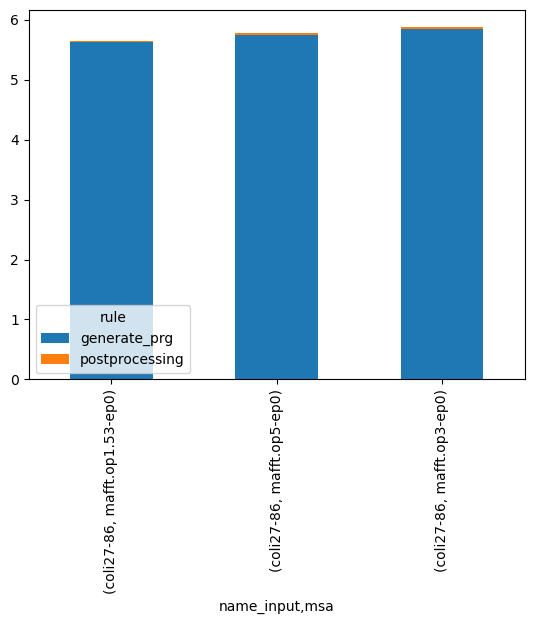

In [78]:
times_by_rule.query("`name_input`=='coli27-86'").sort_values(by="total")[[x for x in rules]].plot(kind="bar", stacked=True)

## PanPA
___

In [79]:
# REF_EXPERIMENT="didelot"
TOOL="PanPA"

PATH_LOGS=Path(f"/data/pangeblocks-experiments/{REF_EXPERIMENT}-{TOOL}")
logs = list(PATH_LOGS.rglob("*.err.log"))
len(logs)

12

In [80]:
data_from_logs=[]
for log in logs:
    name_input, rule = log.stem.replace(".err","").split("-rule-")
    name_input=name_input.replace(".fasta","")
    print(time_from_log(log))

    # msa 
    folder_msa = [t for t in str(log).split("/") if "output-" in t][0]
    msa = folder_msa.split(f"-{REF_EXPERIMENT}-")[1]

    data_log = {"name_input": name_input,
                "rule": rule,
                "msa": msa,
                }

    data_log.update(time_from_log(log))

    data_from_logs.append(data_log)

{'user_time': 0.57, 'sys_time': 0.11, 'wall_clock': 0.69, 'max_mem': 32512}
{'user_time': 0.56, 'sys_time': 0.12, 'wall_clock': 0.69, 'max_mem': 32452}
{'user_time': 0.62, 'sys_time': 0.08, 'wall_clock': 0.7, 'max_mem': 32492}
{'user_time': 0.57, 'sys_time': 0.08, 'wall_clock': 0.67, 'max_mem': 32516}
{'user_time': 0.69, 'sys_time': 0.14, 'wall_clock': 1.82, 'max_mem': 32236}
{'user_time': 0.68, 'sys_time': 0.15, 'wall_clock': 1.83, 'max_mem': 32076}
{'user_time': 0.63, 'sys_time': 0.14, 'wall_clock': 1.78, 'max_mem': 32152}
{'user_time': 0.68, 'sys_time': 0.16, 'wall_clock': 1.83, 'max_mem': 32144}
{'user_time': 0.56, 'sys_time': 0.1, 'wall_clock': 0.67, 'max_mem': 32172}
{'user_time': 0.58, 'sys_time': 0.13, 'wall_clock': 0.71, 'max_mem': 32228}
{'user_time': 0.57, 'sys_time': 0.1, 'wall_clock': 0.68, 'max_mem': 32300}
{'user_time': 0.55, 'sys_time': 0.13, 'wall_clock': 0.68, 'max_mem': 32252}


In [81]:
times_panpa=pd.DataFrame(data_from_logs)

In [82]:
times_by_gfa=times_panpa.groupby(["name_input","msa","rule"]).agg({"user_time": 'sum',"sys_time": 'sum',"wall_clock":'sum', "max_mem": 'max'})
times_by_gfa

user_time  sys_time  \
name_input msa              rule                                      
coli27-86  mafft.op1.53-ep0 graph_construction       0.57      0.08   
           mafft.op3-ep0    graph_construction       0.63      0.14   
           mafft.op5-ep0    graph_construction       0.58      0.13   
slpa-basis mafft.op1.53-ep0 graph_construction       0.57      0.11   
           mafft.op3-ep0    graph_construction       0.69      0.14   
           mafft.op5-ep0    graph_construction       0.57      0.10   
slpa-real  mafft.op1.53-ep0 graph_construction       0.62      0.08   
           mafft.op3-ep0    graph_construction       0.68      0.15   
           mafft.op5-ep0    graph_construction       0.56      0.10   
slpa-simu  mafft.op1.53-ep0 graph_construction       0.56      0.12   
           mafft.op3-ep0    graph_construction       0.68      0.16   
           mafft.op5-ep0    graph_construction       0.55      0.13   

                                                wall_clock  max_mem  
name_input msa              rule                                     
coli27-86  mafft.op1.53-ep0 graph_construction        0.67    32516  
           mafft.op3-ep0    graph_construction        1.78    32152  
           mafft.op5-ep0    graph_construction        0.71    32228  
slpa-basis mafft.op1.53-ep0 graph_construction        0.69    32512  
           mafft.op3-ep0    graph_construction        1.82    32236  
           mafft.op5-ep0    graph_construction        0.68    32300  
slpa-real  mafft.op1.53-ep0 graph_construction        0.70    32492  
           mafft.op3-ep0    graph_construction        1.83    32076  
           mafft.op5-ep0    graph_construction        0.67    32172  
slpa-simu  mafft.op1.53-ep0 graph_construction        0.69    32452  
           mafft.op3-ep0    graph_construction        1.83    32144  
           mafft.op5-ep0    graph_construction        0.68    32252

In [83]:
rules = ["graph_construction"]

times_by_rule = times_by_gfa["user_time"].unstack()
times_by_rule["total"] = times_by_rule.apply(lambda row: sum(row[rule] for rule in rules), axis=1) 
times_by_rule

rule                         graph_construction  total
name_input msa                                        
coli27-86  mafft.op1.53-ep0                0.57   0.57
           mafft.op3-ep0                   0.63   0.63
           mafft.op5-ep0                   0.58   0.58
slpa-basis mafft.op1.53-ep0                0.57   0.57
           mafft.op3-ep0                   0.69   0.69
           mafft.op5-ep0                   0.57   0.57
slpa-real  mafft.op1.53-ep0                0.62   0.62
           mafft.op3-ep0                   0.68   0.68
           mafft.op5-ep0                   0.56   0.56
slpa-simu  mafft.op1.53-ep0                0.56   0.56
           mafft.op3-ep0                   0.68   0.68
           mafft.op5-ep0                   0.55   0.55

<Axes: xlabel='name_input,msa'>

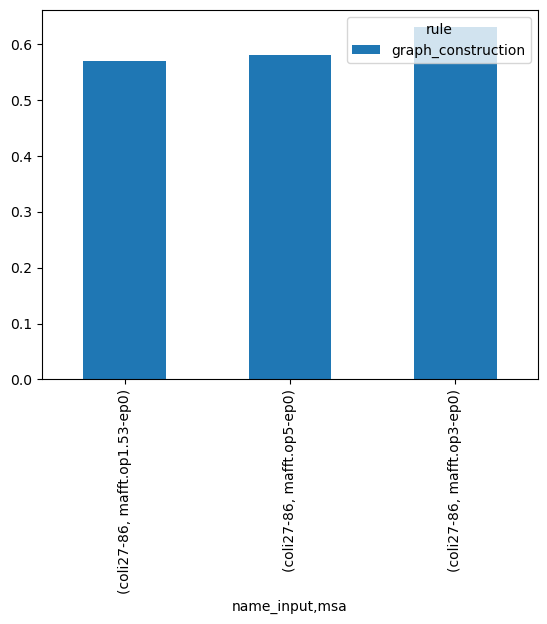

In [84]:
times_by_rule.query("`name_input`=='coli27-86'").sort_values(by="total")[[x for x in rules]].plot(kind="bar", stacked=True)

## pggb

In [85]:
TOOL="pggb"

PATH_LOGS=Path(f"/data/pangeblocks-experiments/{REF_EXPERIMENT}-{TOOL}")
logs = list(PATH_LOGS.rglob("*.err.log"))
len(logs)

4

In [86]:
data_from_logs=[]
for log in logs:
    name_input, rule = log.stem.replace(".err","").split("-rule-")
    print(time_from_log(log))

    data_log = {"name_input": name_input,
                "rule": rule,
                "msa": "wfmash",
                }

    data_log.update(time_from_log(log))

    data_from_logs.append(data_log)

{'user_time': 23.88, 'sys_time': 12.87, 'wall_clock': 30.46, 'max_mem': 894976}
{'user_time': 99.87, 'sys_time': 55.22, 'wall_clock': 90.24, 'max_mem': 1173856}
{'user_time': 143.73, 'sys_time': 96.99, 'wall_clock': 148.14, 'max_mem': 1518412}
{'user_time': 44.29, 'sys_time': 10.34, 'wall_clock': 29.57, 'max_mem': 189844}


In [87]:
times_pggb=pd.DataFrame(data_from_logs)

In [88]:
times_by_gfa=times_pggb.groupby(["name_input","msa","rule"]).agg({"user_time": 'sum',"sys_time": 'sum',"wall_clock":'sum', "max_mem": 'max'})
times_by_gfa

,,,user_time,sys_time,wall_clock,max_mem
name_input,msa,rule,,,,
coli27-86,wfmash,pggb,44.29,10.34,29.57,189844
slpa-basis,wfmash,pggb,23.88,12.87,30.46,894976
slpa-real,wfmash,pggb,99.87,55.22,90.24,1173856
slpa-simu,wfmash,pggb,143.73,96.99,148.14,1518412


In [89]:
rules = ["pggb"]

times_by_rule = times_by_gfa["user_time"].unstack()
times_by_rule["total"] = times_by_rule.apply(lambda row: sum(row[rule] for rule in rules), axis=1) 
times_by_rule

,rule,pggb,total
name_input,msa,,
coli27-86,wfmash,44.29,44.29
slpa-basis,wfmash,23.88,23.88
slpa-real,wfmash,99.87,99.87
slpa-simu,wfmash,143.73,143.73


<Axes: xlabel='name_input,msa'>

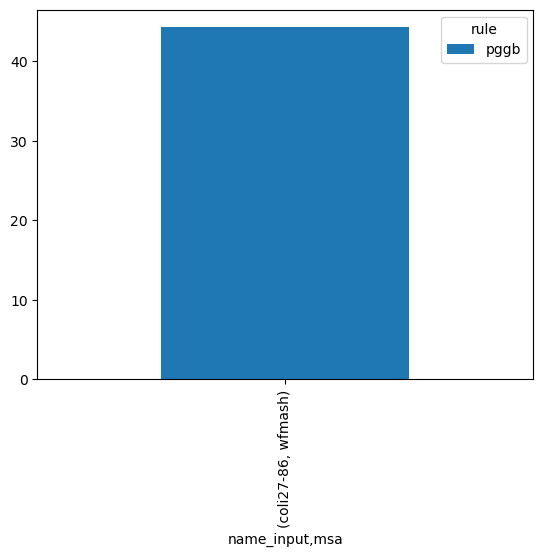

In [91]:
times_by_rule.query("`name_input`=='coli27-86'").sort_values(by="total")[[x for x in rules]].plot(kind="bar", stacked=True)